# Introduction to Python

## Graeme Stewart, EP-SFT

INSIGHTS Workshop, 2018-09-17

<img style="float: right;" src="images/LogoOutline-Blue-03.png">

[GitHub](https://github.com/graeme-a-stewart/python-introduction), [CC-BY-4.0](http://creativecommons.org/licenses/by/4.0/)

# What is Python?

* Python is an open-source high-level interpreted language
* It's an easy language
  * Easy to code in, with many useful modules
  * Easy to read
* It's object oriented
* It's dynamic
* It's portable and it's popular
![Logo](images/python-logo.png)

# Python Popularity

![PYPL Language Popularity](images/python-pypl-popularity.png)

From [PopularitY of Programming Languages](https://pypl.github.io/PYPL.html)

# Python Popularity

![Google Trends in Data Science](images/python-r-cpp-googletrends-data.png)

![Google Trends in Machine Learning](images/python-r-cpp-googletrends-machinelearning.png)

(thanks to [Jim Pivarski](https://github.com/codas-hep/scientific-python-ecosystem))

# What's driving this?

All of the deep learning libraries have a Python interface,
in many cases the primary interface.

![Python ML Interfaces](images/python-ml-interfaces.png)

![Python Ecosystem](images/python-ecosystem.png)

Python has a very rich ecosystem of packages and plugins (taken from Jake VanderPlas, [*The Unexpected Effectiveness of Python in Science*](https://speakerdeck.com/jakevdp/the-unexpected-effectiveness-of-python-in-science) at PyCon 2017)

# But wait, an interpreted language for (big) scientific data...?

Isn't that crazy slow?

* Overall language run time speed is certainly something we care about
  * But developer productivity is also important
* Python is really often used as a **glue** between other pieces of code that are written to have very fast implementations
  * e.g., underlying most Python high performance numerical code is [NumPy](https://www.numpy.org/)
    * Essentially data laid out like C arrays, much more compact than normal Python objects
    * Removes much of Python's runtime overheads, to run *really* fast (in many cases a lot faster than a naive code implementations in C or C++)
* Plus, there are a lot of other tricks that can help speed up Python where needed, e.g., [Cython](http://cython.org/) or [Numba](https://numba.pydata.org/)

# Python - let's go!

<img style="float: right;" src="images/googles.jpg">

How do we get python going?

On most computers it should be simple - just execute `python`...

```py
teal:~$ python
Python 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> print("hello, world!")
hello, world!
>>>
```

Here we started python in its interpreter mode - we can then type commands and Python immediately executes them for us and gives the results (also called the *Read Evaluate Print Loop*, **REPL**)

# ipython - a better shell

The normal `python` shell is fine, but there is a better option, the `ipython` shell:

```py
teal:~$ ipython
Python 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
Type 'copyright', 'credits' or 'license' for more information
IPython 6.4.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: print("hello, world!")
hello, world!
```

# ipython 

What's great about `ipython`?

* Getting help on anything with `?`
  * Type `?` on it's own for some overview
* Jump to the code definition with `??`
* `TAB` completion for modules and methods
* Easy access to history of inputs and outputs (e.g., `_` is the output of the last command)
* Keyboard shortcuts
* Run shell commands easily, using `!cmd`
* Magic commands
  * Try `%magic` for an overview

# notebooks - ipython on steroids

<img style="float: right;" src="images/jupyter-logo-300.png">

Actually, the most useful and coolest way to run Python interactively is in a [*Jupyter Notebook*](https://jupyter.org/).

This is a web based "shell" for running Python interactively. It can do everything that `ipython` can do in a console, but it can do a lot more as well:
* Notebooks can be saved, preserving your work
* Notebooks can be shared with others
* Cells can contain markdown for better annotation of the code
* Notebooks can run lots of languages (R, C++, ROOT)
* Notebooks can be interfaces to much more powerful facilities (SWAN)

See the backup slides for some getting started links for notebooks

(This entire [presentation](https://github.com/graeme-a-stewart/python-introduction) is written as a Jupyter notebook, using the [RISE extension](https://github.com/damianavila/RISE))

# The nuts and bolts...

<img style="float: right;" src="images/nuts-and-bolts.jpg">

Like any other programming language, we need to have some understanding of the syntax of Python to be able to program in it. So let's look at some of the basic building blocks...


* Variables
  * Numbers, Strings, ...
* Compound objects
  * Lists, Dictionaries, Tuples
* Loops and Iterating
* Control Flow
* Functions
* Classes
* Errors and Exceptions

# Variables

## Numbers

* There are two fundamental number types in Python, integers and floats.
  * These behave pretty much as you expect

In [1]:
i=7 
f=9.0
print("My integer is", i, "and my float is", f)

My integer is 7 and my float is 9.0


In [2]:
j=(i*3) + 2
print(j)

23


In [3]:
g=(f*3) + 2
print(g)

29.0


* `int` is effectively unbounded (but for reasonable numbers it's the word size, usually 64bits)
* `float` maps to the C-type `double`, i.e., a usually a 64 bit floating point type

## Operators

All the normal arithmetic operators are available:

In [4]:
i+2-3 # Addition and subtraction <- Look - we introduced you to the Python comment character here!

6

In [5]:
f*3.0/9.0 # Multiplication and division

3.0

In [6]:
i/2 # Note that integer division returns a float

3.5

In [7]:
i//2 # But the // operator does an integer divide

3

In [8]:
i % 2 # Remainder for integer division

1

In [9]:
f**3 # Power operator (also pow(f,3) works) 

729.0

## Conversions and casts

In [10]:
i*f # Mixed mode arithmetic "upcasts" to float

63.0

In [11]:
g=i*f+0.5
int(g) # Cast the float result into an integer

63

In [12]:
float(i) # Cast an int into a float

7.0

"Normal" precedence rules apply: power then unary minus then mult/div then add/sub (remember, parentheses are your friends!)

In [13]:
-f**2*-1

81.0

## Complex

Complex numbers are a Python basic type too, formed of a real and imaginary floating point pair


In [14]:
2.0+21j # Compose with "j" for the complex part

(2+21j)

In [15]:
complex(7,-9) # Or pass two arguments to the "complex" function

(7-9j)

In [16]:
c=1+2j
print(c*f)

(9+18j)


In [17]:
c.real

1.0

In [18]:
c.imag

2.0

In [19]:
abs(c)

2.23606797749979

## Strings

For storing text in Python we use *strings*, which are just immutable sequences of characters:

In [20]:
s="this is a dead parrot string"; t=str("it's Norwegian Blue") # single quotes are fine too
print(s, t)

this is a dead parrot string it's Norwegian Blue


In [21]:
s + " it has ceased to be!" # Use "+" to concatenate

'this is a dead parrot string it has ceased to be!'

Strings are unicode in Python3 (but watch out, they aren't in Python2)

In [22]:
s2=str("this parrot " + '\U0001F600' + " wouldn't go Voom! if you put a million volts though it")
print(s2)

this parrot 😀 wouldn't go Voom! if you put a million volts though it


In [23]:
long_s='''this is a long
string split over a few lines and has it's own "quotes" and 'quotes'
so using the triple quote syntax is pretty useful'''
print(long_s)

this is a long
string split over a few lines and has it's own "quotes" and 'quotes'
so using the triple quote syntax is pretty useful


## String Operations and Maniplulation

In [24]:
str(3.14159) # The str() function will also convert something to a string

'3.14159'

In [25]:
mp="the Monty Python show"
len(mp) # This is the length of the string

21

In [26]:
mp.upper()

'THE MONTY PYTHON SHOW'

In [27]:
mp.title()

'The Monty Python Show'

In [28]:
mp.find("Python") # This gives the character index where the substring starts (or -1 if not found)

10

In [29]:
'   one very useful manipulation is to remove leading/trailing whitespace    '.strip()

'one very useful manipulation is to remove leading/trailing whitespace'

In [30]:
'# or to see if a string starts with a particular character'.startswith("#")

True

## ipython help

Let's try using ipython's help and tab completion to get documentation on strings

In [31]:
str?

## Bool

Python has a built in *boolean* type as well, which can be `True` or `False`

In [32]:
t=True; f=bool(False)
print(t, f)

True False


A boolean is the output of the comparison operator, `==`

In [33]:
print(t==f, 7==3+4)

False True


And Python has the usual suite of Boolean operators (do use parentheses!)

In [34]:
(1==1) and (7>9)

False

In [35]:
(1==1) or (7>9)

True

In [36]:
not True

False

## Boolean curiosities...

Booleans will cast into the numbers 1 (`True`) and 0 (`False`)

This leads to some occasionally unexpected behaviour ...

In [37]:
print(9==True, 0.0==False) # Numnbers are False if zero, True otherwise

False True


The `bool()` function will cast it's argument into a truth value, but it's not really recommended to do this, e.g., although strings will cast to `True` if non-zero length, it's not really obvious or clear...

In [38]:
s="the naked truth"
print(bool(s)) # Not clear

True


In [39]:
print(len(s) > 0) # Much clearer

True


# Null Value

Python has an explicit *null* value, which can be assigned to any variable using `None`

In [40]:
not_here = None
print(not_here)

None


`None` is used to explicitly signal that a value is unset or missing

It's a common idiom in Python to use the fact that a `None` value is considered `False`

# Compound Objects

## Lists

Lists are Python's way of grouping objects together - with lists we start to see some of the power of python as a dynamic language

Define a list using square brackets and commas to separate elements:

In [41]:
my_list = [2, 3, 5, 7, 11, 13]
print(my_list)

[2, 3, 5, 7, 11, 13]


Lists are ordered and indexed from zero

Use the [] operator to access a specific list element

In [42]:
print(my_list)

[2, 3, 5, 7, 11, 13]


In [43]:
my_list[2] # N.B. This is the third element!

5

If a negative index is given, the list is accessed counting from the right, with -1 as the last element

In [44]:
my_list[-1]

13

In [45]:
my_list[-3] # Third element from the end

7

In [46]:
len(my_list) # len() gives the total number of elements in the list

6

Lists are also mutable, you can change elements as you like:

In [47]:
my_list[0] = 42

In [48]:
my_list[-1] = "bicycle repair man"

In [49]:
print(my_list)

[42, 3, 5, 7, 11, 'bicycle repair man']


Add elements to a list using `append`:

In [50]:
my_list.append(True)

In [51]:
print(my_list)

[42, 3, 5, 7, 11, 'bicycle repair man', True]


And delete them with the `del` keyword:

In [52]:
del my_list[0]
print(my_list)

[3, 5, 7, 11, 'bicycle repair man', True]


As you can see, Python is more than happy to have mixed object types in a list!

## List Slices

For for extracting ranges out of lists, `[i:j]`, gets the elements of the list from `i` up to **but not including** `j`


In [53]:
lst=list(range(10))
print(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [54]:
lst[1:3]

[1, 2]

In [55]:
lst[5:-1] # Negative indexes act as before

[5, 6, 7, 8]

In [56]:
lst[:4] # Missing the first index means "start at the beginning"

[0, 1, 2, 3]

In [57]:
lst[7:] # Missing the last index means "stop at the end"

[7, 8, 9]

In [58]:
lst[0:7:2] # A third paramater is a "stride" value

[0, 2, 4, 6]

In [59]:
lst[:] # What use is this...?

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The answer is that slices are always copies, so this made a *new copy* of the list

## Dictionaries

Dictionaries are used to hold unordered arrays of *keys* and *values*

Python dictionaries can have pretty much anything for the values; keys are restricted to immutable objects

In [60]:
d={"straight" : "Graham Chapman",
   "curved" : "John Cleese",
   "drawn" : "Terry Gilliam",
   "mild" : "Michael Palin"}
print(d)

{'straight': 'Graham Chapman', 'curved': 'John Cleese', 'drawn': 'Terry Gilliam', 'mild': 'Michael Palin'}


In [61]:
d["curved"] # Accessor uses [], like lists, but with the key and returns the value

'John Cleese'

In [62]:
d["extra"] = "Graeme Stewart" # Add or mutate values just by setting them
d["curved"] = "some other guy"
print(d["extra"], "and", d["curved"])

Graeme Stewart and some other guy


In [63]:
del d["extra"] # Use the del operator to remove entries
"extra" in d   # This is the notation to ask if a certain key exists in the dictionary

False

## Container merging

We saw how to add single items to containers, but there are also useful methods that merge containers into one another

For lists, you can `extend` one list with another

In [64]:
lst_1=["cats", "lizards", "parrots"]; lst_2=["beetles", "worms", "spiders"]
lst_1.extend(lst_2)
print(lst_1)

['cats', 'lizards', 'parrots', 'beetles', 'worms', 'spiders']


For dictionaries use `update` (N.B. existing keys get overwritten)

In [65]:
art={"picasso": "Guernica", "blanchard": "Mujer con abanico", "miro": "Mai 1968"}
more_art={"macdonald": "A Paradox", "pollock": "Full Fathom Five", "miro": "Miss Chicago"}
art.update(more_art)
print(art, len(art))

{'picasso': 'Guernica', 'blanchard': 'Mujer con abanico', 'miro': 'Miss Chicago', 'macdonald': 'A Paradox', 'pollock': 'Full Fathom Five'} 5


## Tuples

As well as lists, Python supports *tuples*, which are like lists but *immutable*

Tuples are defined by using commas to separate the different items in the tuple sequence:

In [66]:
tup = (7, "bannanas", True, None)
print(tup)
tup2 = "the", "parentheses", "are", "optional"
print(tup2)

(7, 'bannanas', True, None)
('the', 'parentheses', 'are', 'optional')


Tuples can be assigned to separate variables like this:

In [67]:
a1, a2, a3, a4 = tup
print(a2)

bannanas


This is a very common way to return multiple values from functions (you have to provide the same number of variables as the length of the tuple)

# Other Container Types

Just to mention other containers that we didn't have time to look at here:

* `set` - mutable unordered container of distinct objects
* `frozenset` - as above, but immutable

And the `collections` module defines some other containers that can be useful, like ordered dictionaries


# Iterators and Loops

We met container types in the last section and very often we want to have an action performed repetitively on the contents of a container, or we want to loop over some other pieces of data.

In [68]:
lst_1=["cats", "lizards", "parrots"];
for animal in lst_1:
    print("Today I was bitten by", animal)

Today I was bitten by cats
Today I was bitten by lizards
Today I was bitten by parrots


The Pythonic idiom here is very common: `for ITEM in COLLECTION`.

But in fact it would be better to describe what the `ITEM` runs over as an **iterator**. In Python an iterator is anything that can produce a sequence of values. e.g., if it is a file then it's each line of the file

In [69]:
macbeth=open("src/macbeth.txt")
for line in macbeth:
    print(line, end="")

  -------------------------------------------------
               The Tragedy of Macbeth

   Shakespeare homepage | Macbeth | Act 1, Scene 1
                     Next scene
  -------------------------------------------------

SCENE I. A desert place.

  _Thunder and lightning. Enter three Witches_

FIRST WITCH

  When shall we three meet again
  In thunder, lightning, or in rain?

SECOND WITCH

  When the hurlyburly's done,
  When the battle's lost and won.

THIRD WITCH

  That will be ere the set of sun.

FIRST WITCH

  Where the place?

SECOND WITCH

  Upon the heath.

THIRD WITCH

  There to meet with Macbeth.

FIRST WITCH

  I come, Graymalkin!

SECOND WITCH

  Paddock calls.

THIRD WITCH

  Anon.

ALL

  Fair is foul, and foul is fair:
  Hover through the fog and filthy air.

  _Exeunt_

  -------------------------------------------------
   Shakespeare homepage | Macbeth | Act 1, Scene 1
                     Next scene

  -------------------------------------------------


For iterating over a list (or a file) what we iterate over is clear, but what about a dictionary?

The *default* iterator on the dictionary are the keys:

In [70]:
for k in art:
    print(k, "painted", art[k])

picasso painted Guernica
blanchard painted Mujer con abanico
miro painted Miss Chicago
macdonald painted A Paradox
pollock painted Full Fathom Five


But there is also a `values` iterator and a (key, value) iterator, called `items`

In [71]:
for v in art.values():
    print(v.upper(), "is a great painting")

GUERNICA is a great painting
MUJER CON ABANICO is a great painting
MISS CHICAGO is a great painting
A PARADOX is a great painting
FULL FATHOM FIVE is a great painting


In [72]:
for k,v in art.items():    # The return value of each iteration is a two value tuple
    print(v.upper(), "is a great painting by", k)

GUERNICA is a great painting by picasso
MUJER CON ABANICO is a great painting by blanchard
MISS CHICAGO is a great painting by miro
A PARADOX is a great painting by macdonald
FULL FATHOM FIVE is a great painting by pollock


# A syntactic excursion

Now that we touched on iterators, there's another thing we should highlight, *Python's indentation syntax* that marks out *code blocks*

Unlike other languages that might use some braces, `{` and `}`, to mark pieces of code which are in the same block, python uses indentation

Any lines of code that have the same indentation are in the same block

In [73]:
l = list()
for k in art:                    # Note the use of the ":" here, also used in control flow
    l.append(k)                  # This line is in the indented code block, so it's executed each time
    l.append(art[k].swapcase())  # So is this one
print(l)                         # This one is not, so the code block ends on the previous line, this is outside

['picasso', 'gUERNICA', 'blanchard', 'mUJER CON ABANICO', 'miro', 'mISS cHICAGO', 'macdonald', 'a pARADOX', 'pollock', 'fULL fATHOM fIVE']


Depending on your mood you can view this as a wonderful exercise in uncluttered efficiency or as a painful nightmare where it becomes really hard to work out which lines are in the same block


The [very strong advice](https://www.python.org/dev/peps/pep-0008/#tabs-or-spaces) is to always use spaces, never tabs; use a good editor to help

# Conditional Control Flow

Python can execute code conditionally, using an `if ... elif ... else` syntax that will not really surprise you

In [74]:
for number in range(10):
    print("Oh,", number, "- ", end='')
    if number < 3:
        print("that's small")
    elif number < 7:
        print("that's medium")
    else:
        print("that's big")

Oh, 0 - that's small
Oh, 1 - that's small
Oh, 2 - that's small
Oh, 3 - that's medium
Oh, 4 - that's medium
Oh, 5 - that's medium
Oh, 6 - that's medium
Oh, 7 - that's big
Oh, 8 - that's big
Oh, 9 - that's big


Evidently this also shows how loops and control statements are naturally nested

## Ternary operator

Python has a compact version of `if ... then ... else ...` called a *ternary operator*

In Python this has a nice natural syntax

In [75]:
st = "it's the truth, Ruth" if len(art) == 5 else "it's a lie, Sky"
print(st)

it's the truth, Ruth


# Loop Control

You can write a conditional control loop in Python with `while (CONDITION) ...`

In [76]:
i=0
while (i<5):
    print(i)
    i+=1          # Note this nice syntax for adding to a number (it's the same as "i=i+1")
                  # Also supported are "-=", "*=", "/=" - they do what you would expect

0
1
2
3
4


## Better Loop Control

Usually a nicer way to get control in loops is to use the keywords `continue` and `break`:
* `continue` stops this iteration and jumps back to the start to get the next value
* `break` exits the loop immediately

In [77]:
words = ['bark', 'nothing', 'roll over', 'die', 'eat']
for cmd in words:
    if cmd == 'nothing':
        continue
    if cmd == 'die':
        break
    print(cmd)

bark
roll over


# Comprehensions

Python has a rather lovely syntax for generating output lists and dictionaries from other iterables

It's very commonly used and replaces a many things that would require short loops with a compact single line

In [78]:
[ x**2 for x in [1, 3, 5, 7, 11, 13, 17] ]

[1, 9, 25, 49, 121, 169, 289]

You can read this as `OUTPUT for ITEM in ITERABLE`, and enclosing it within the `[]`s lets Python know this is a *list comprehension*

In [79]:
[ x**2 for x in range(1,100) if x%10 == 0 ]

[100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100]

Above we also added a condition that selected only certain elements of the list

Dictionary comprehensions are very similar to those for lists, just that the output is specified as `key: value` and the syntax for a dictionary comprehension is an expression enclosed in `{}`s

In [80]:
{ x: x**2 for x in range(1,100) if x%10 == 0 }

{10: 100,
 20: 400,
 30: 900,
 40: 1600,
 50: 2500,
 60: 3600,
 70: 4900,
 80: 6400,
 90: 8100}

# Functions

Now we know enough of the nuts and bolts of Python to start building some more interesting things

![Meccano toy](images/meccano.jpg)

Functions are how we start to encapsulate behaviour in our programs, so that tasks can be isolated from one another and different parts of the program don't interfere

Functions normally take some inputs and give back outputs, although skipping one or the other is quite common

In Python we define a function with the `def` keyword:

In [81]:
def double_and_more(i, j):
    '''A trivial function'''
    k = i*2
    k += j
    return k

In [82]:
help(double_and_more) # This is the same as double_and_more? in ipython

Help on function double_and_more in module __main__:

double_and_more(i, j)
    A trivial function



In [83]:
print(double_and_more(7, 5)) # Call a function with its name, followed by (), with any arguments inside

19


In [84]:
def double_and_more(i, j):
    '''A trivial function'''
    k = i*2
    k += j
    return k

* The arguments are given in parentheses after the name of the function
* The string immediately after the `def` is called the *docstring* and is printed when the user asks for help
  * Excepting trivial functions, do always write a docstring
* The `return` value exits the function, returning any values given (can be as many as you like, as a tuple)
  * If there's no return value at the end of the function it implicitly returns `None`
* Variables defined in the scope of the function block are local and not visible outside of it (this is a *good thing*)

Parameters that get passed to a function in Python are *named* and it's usually clearer if the client calls them using that name, e.g.,

In [85]:
def maths_circus(num, message):
    '''A noisy cuber'''
    print("We are shouting, '", message, "', for you", sep="")
    n = num**3
    return n
maths_circus(num=-4, message="pancakes")

We are shouting, 'pancakes', for you


-64

This also means that parameters can be given in any order...

In [86]:
maths_circus(message="I love clowns", num=9)

We are shouting, 'I love clowns', for you


729

Parameters can also be given default values, then they can be skipped by the client unless they wish to override the default

In [87]:
def maths_circus(num=7, message="what have the Romans ever done for us?"):
    '''A noisy cuber, with defaults'''
    print("We are shouting, '", message, "', for you", sep="")
    n = num**3
    return n
maths_circus() # Both parameters skipped - use defaults

We are shouting, 'what have the Romans ever done for us?', for you


343

In [88]:
maths_circus(num=-2) # message skipped - use default

We are shouting, 'what have the Romans ever done for us?', for you


-8

In [89]:
maths_circus(message="roads, vineculture, public baths, ...") # num skipped - use default

We are shouting, 'roads, vineculture, public baths, ...', for you


343

In [90]:
maths_circus(message="confuse a cat", num=-4) # Both parameters specified - defaults overridden

We are shouting, 'confuse a cat', for you


-64

## Optional Arguments

Sometimes functions need to be able to take *arbitrary* numbers of arguments, which Python can allow using the `*args` and the `**kwargs` parameters

If a function defines these special argument types then

* `args` will be a list of all positional parameters (in the order given)
* `kwargs` will be a dictionary of named arguments, with the key being the name

In [91]:
def mill(debug, *args, mesg="starting", **kwargs):
    '''Process all arguments'''
    print("debug:", debug)
    print(mesg)
    print("These are the positional arguments", args)
    print("These are the named arguments", kwargs)

mill(True, 1, 2, 4, mesg="hello", alice="good", bob="good", eve="spy")

debug: True
hello
These are the positional arguments (1, 2, 4)
These are the named arguments {'alice': 'good', 'bob': 'good', 'eve': 'spy'}


Do not use these argument types to be lazy - it can be very difficult to debug functions that support arbitrary arguments (e.g., misspelling an argument name is a bugbear here)

# Python Scripts

So far we have worked in the Python interpreter

This is a fantastic way to explore python and work interactively, but in many cases we want to work in a *hands off* manner

In this case, we would rather save our work in a file and get the Python interpreter to execute it for us

In [92]:
!cat src/hello.py

#!/usr/bin/env python
print("hello, world!")


In [93]:
!python src/hello.py

hello, world!


In [94]:
!ls -l src/hello.py

-rwxr-xr-x  1 graemes  staff  45 15 Sep 13:40 src/hello.py


In [95]:
!./src/hello.py

hello, world!


```py
#!/usr/bin/env python
print("hello, world!")
```

* Execute the script directly with python by giving it as the argument, `python hello.py`
* On Linux / OS X we can
  * Use the magic shebang `#!` at the start of the file so that the loader invokes python for us
  * Use `/usr/bin/env python` so that the version of Python is found from `PATH`
  * The script also needs to be marked as executable: `chmod a+x hello.py`


## Passing arguments to scripts

Let's look at another version of our hello script:

In [96]:
!cat src/hello-args.py

#!/usr/bin/env python
import argparse

parser = argparse.ArgumentParser(description="Say hello")
parser.add_argument('--name')

args = parser.parse_args()

print("hello,", args.name)


In [97]:
!python src/hello-args.py --name Brian

hello, Brian


In [98]:
!python src/hello-args.py

hello, None


In [99]:
!python src/hello-args.py --help

usage: hello-args.py [-h] [--name NAME]

Say hello

optional arguments:
  -h, --help   show this help message and exit
  --name NAME


# Python Modules

There was a lot there! The first thing in the script was to import a Python *module*: `import argparse`

Modules are the way that Python extends functionality - it's one of the huge advantages of Python that it has such a rich set of modules that provide well written and easy to use extensions to the core language

In this case we imported the `argparse` module, which is a standard Python module provided by all Python installations


In [100]:
import argparse
argparse?

Python modules usually provide well written interfaces with additional functionality - you might write your own parser for arguments passed in to your script, but making it robust and providing functionality like the `--help` option would take a lot of time

The Python documentation lists the many, many [modules that are available](https://docs.python.org/3/py-modindex.html) in every standard Python installation

In addition many other modules come packaged with, e.g., the [Anaconda Python distribution](https://www.anaconda.com/) or through the standard [*PyPI*](https://pypi.org/) (Python Package Index) repository, installed with `pip`

# Importing from modules

When we import from a module by default, the module name is added to the namespace and the module's functions and other members (attributes) become available to us under that name

In [101]:
import os            # Import the os module (this is a really common one as it allows many core interactions with 
                     # the underlying system)
os.environ["PATH"]   # environ is a dictionary with the current envionment set, and it's not in the os part of the namespace

'/Users/graemes/anaconda3/bin:/Users/graemes/anaconda3/bin:/Users/graemes/bin:/usr/local/bin:/Users/graemes/bin:/usr/local/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin:/sbin:/usr/sbin:/usr/local/sbin:/sbin:/usr/sbin:/usr/local/sbin'

However, we can also import pieces of a module directly into the top level of the namespace, or import a module or member with a different name

In [102]:
from sys import executable
print(executable)

/Users/graemes/anaconda3/bin/python


In [103]:
import math as maths # The British would have called it maths...
maths.sqrt(9)

3.0

In [104]:
from math import pi as half_tau
tau = 2.0 * half_tau
print(tau)

6.283185307179586


It's possible to import everything from a module into the top namespace in Python, using `from module import *`; this is really dangerous as it becomes extremely hard to know how the namespace was populated. **Try to avoid**

## Writing your own modules

Of course once you know modules can be written, you'd probably like to know how to do it yourself

In [105]:
# Note this - "!" is an ipython special that allows us to execute a shell command
!cat mymod.py 

# This is a trivial python module
modvar=0


In [106]:
import mymod
print(mymod.modvar)

0


In [107]:
mymod.modvar+=1
print(mymod.modvar)

1


This is pretty easy - any python file found in the current directory can be imported as a module, then it becomes available, using the filename as the namespace entry

Actually, the files don't need to live in the current directory, `$PYTHONPATH` gets searched (from the shell), or `sys.path` inside Python itself

# Classes

Classes are at the core of all object oriented programming languages, and Python is no exception

Python has a very natural way of defining and expressing classes - let's look at a simple example

In [108]:
class CounterClass:
    def __init__(self):
        self.counter = 0
        
    def add(self):
        self.counter += 1
        
    def reset(self):
        self.counter = 0
        
    def get(self):
        return self.counter
    
c = CounterClass()
c.add(); c.add()
print(c.get())

2


In [109]:
c.reset()
print(c.get())

0


Some of the key features to note:
```py
class CounterClass:
    def __init__(self):
        self.counter = 0
        
    def add(self):
        self.counter += 1
...```

* The keyword `class` introduces a class definition in its following code clock
  * The class will define a new type in the current scope
* Class methods are defined very like functions, using `def`
  * The first parameter is the class instance itself, by convention always called `self`
* The special method `__init__` is called when an instance of the class is created (a.k.a. a constructor)
  * (BTW, there are lots of these [special `__FOO__` attributes](https://docs.python.org/3/reference/datamodel.html#special-method-names) in Python, e.g., `__del__` is your destructor)
* All data members of the class are referenced via the object instance, `self`
  * `self.counter` is a *data member* of the class
  * `counter` would be a plain local variable (watch out!)

Just as an aside, when we say that Python is a dynamic language, it means that even classes can be modified dynamically:

In [110]:
def set(self, n):
    self.counter = n

# Add the "set" function as a new method to the class
CounterClass.set = set
c.set(7)
print(c.get())

7


In [111]:
CounterClass.msg = "we just added a new data member as well"
print(c.msg)

we just added a new data member as well


## Classes, Scopes and Namespaces

Python implements classes as a new data type, which means that they have their own scope and namespace

To find out what attributes are defined in a scope we can use the Python builtin `dir` function

In [112]:
dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add',
 'counter',
 'get',
 'msg',
 'reset',
 'set']

## Subclasses and Inheritance

Python classes can also inherit from other classes, becoming subclasses - this allows objects which extend or specialise the classes that they inherit from in the usual object oriented way

In [113]:
class Poly2:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

class Rectangle(Poly2):
    def area(self):
        return self.x*self.y
        
class Triangle(Poly2):
    def area(self):
        return self.x*self.y/2.0

In [114]:
rect=Rectangle(3,5)
print(rect.area())

15


In [115]:
tri=Triangle(10,4)
print(tri.area())

20.0


In [116]:
picasso=Poly2()
'area' in dir(picasso) # This is a way to ask the object if it has an attribute of that name

False

So much for extending classes, we can override methods from the base classes as well:

In [117]:
class Square(Rectangle):
    def __init__(self, x=0):
        self.x = x
        
    def area(self):
        return self.x**2

sq=Square(4)
print(sq.area())

16


The way that Python searches for attributes in a derived class is to search the derived class first, then any parent classes, so the derived class's definition wins out

The derived class can call methods in the parent class - have a look at [`super()`](https://docs.python.org/3/library/functions.html#super)

## Class Introspection

On point that might be coming clear to you now is that Python is quite happy to pass *any* objects into function calls of methods

If the passed object has the right properties to work with the call, it works; if not, then something will fail (this is known in the trade as *Duck Typing*)

Two useful functions can be used to inspect a class's providence
* `isinstance(obj, classinfo)` returns `True` if the object is an instance of, or derived from, the classinfo class
* `issubclass(class, classinfo)` returns `True` if the object is a subclass of the classinfo class

In [118]:
print(isinstance(sq, Poly2))

True


In [119]:
print(issubclass(Triangle, Poly2))

True


In [120]:
print(issubclass(Triangle, Rectangle))

False


While we're on the subject, note that the builtin `type` function will return an object's type

In [121]:
print(type(Triangle), type("python"), type(7))

<class 'type'> <class 'str'> <class 'int'>


## Class data members

Data members of Python classes are pretty exposed - they can be accessed and *modified* by clients

This would usually be rather dangerous as it would be easy to violate an invariant of the class this way

In Python there is a convention that methods starting with an underscore (`_`) are not to be accessed directly by clients (this is by convention, members called `__NAME` get additionally mangled by Python to prevent accidents)

In [122]:
class Rectangle2:
    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y
    
    def area(self):
        return self._x*self._y

rec=Rectangle2(2,8)
print(rec.area())

16


In [123]:
# Although this still works
rec._x

2

### Getters and setters

You should usually then write getters and setters for your "public" data members

In [124]:
class Rectangle3:
    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y
    
    def area(self):
        return self._x*self._y
    
    def x(self):
        return self._x
    
    def set_x(self, x):
        if x >= 0.0:
            self._x = x
    
rec=Rectangle3(2,4)
print(rec.area())
rec.set_x(9)
print(rec.x(), rec.area())

8
9 36


Hmmm, but that `()` syntax is a bit of ugly boilerplate, right?

## Decorators and Properties

Python has a very neat way to turn getters and setters into much more natural feeling *properties* like this

In [125]:
class Rectangle4:
    def __init__(self, x=0, y=0):
        self._x = x
        self._y = y
    
    @property
    def area(self):
        return self._x*self._y
    
    @property
    def x(self):
        return self._x
    
    @x.setter
    def x(self, value):
        if value >= 0.0:
            self._x = value
    
rec=Rectangle4(2,4)
print(rec.area, rec.x)
rec.x=9
rec.x=-5
print(rec.x, rec.area)

8 2
9 36


This is the recommended way of getting and setting data members, with the functions wrapped up feel more natural

The syntax of `@property` is what's known as a *decorator* in Python - think of it like a way of wrapping up a function to change some of its exposed interfaces or behaviours

# Errors and Exceptions

So far all of the simple examples we looked at here have worked as expected - real life isn't like that and things are definitely going to go wrong

So how do we deal with errors in Python?

When something mis-fires in Python an *exception* is raised:

In [126]:
st="bring out your dead"
st.fnd("dead")

AttributeError: 'str' object has no attribute 'fnd'

In [127]:
x=7; y=5
print(x/(y-5))

ZeroDivisionError: division by zero

## Handling exceptions

The way to handle exceptions in Python is to use a `try... except...` block:

In [128]:
try:
    x=7; y=5
    print(x/(y-5))
except ZeroDivisionError:
    print("please don't divide by zero")

please don't divide by zero


There can be multiple `except` blocks, for handling different errors that might happen:

In [129]:
try:
    f=open("/tmp-file.txt", "w")
    print("some text", file=f)
except OSError:
    print("Failure opening file")
except IOError:
    print("Error writing to file")

Failure opening file


If you want to handle multiple exceptions with one piece of code, you can use `as` to set a local variable with one of a few exceptions

In [130]:
try:
    f=open("/tmp-file.txt", "w")
    print("some text", file=f)
except (OSError, IOError) as e:
    print("Failure during file handling:", e)

Failure during file handling: [Errno 13] Permission denied: '/tmp-file.txt'


Notice also that exceptions are printable, and provide some normally helpful text

Exceptions are code blocks and can nest other exception handlers inside themselves, so it's possible to structure your error handling and (possible) recovery in fairly sophisticated ways

In [131]:
def divider(x, y):
    try:
        a = x/y
    except ZeroDivisionError:
        a = 0
    return a

try:
    f=open("tmp-file.txt", "w")
    print(divider(7,0), file=f)
except (OSError, IOError) as e:
    print("Failure during file handling:", e)

!cat tmp-file.txt

If your own code needs to generate an exception, use `raise`:

In [132]:
def buy(price, money):
    if money < price:
        raise RuntimeError("Not enough money to buy")
    money -= price

buy(100.0, 50.0)

RuntimeError: Not enough money to buy

If you are writing anything other than trivial code, you will want to define exception classes for you own program, which Python makes it easy to do, as you can just inherit from the built in `Exception` class

In [133]:
class TutorialException(Exception):
    pass # pass is a very handy bit of python syntax used for supporting an empty code block

## LBYL and EAFP

Programming life could be divided into two strategies for dealing with errors

* *Look Before You Leap* - check that things are going to be ok first
* *Easier to Ask Forgiveness than Permission* - go for it and clean up if you need to

In [134]:
my_dict={"k": "v"}

# Easier to Ask Forgiveness than Permission
try:
    x = my_dict["key"]
except KeyError:
    pass # in real life handle missing key (EAFP)

# Look Before You Leap
if "key" in my_dict:
    x = my_dict["key"]
else:
    pass # in real life handle missing key (LBYL)

In general Python prefers EAFP - there are a few advantages (like avoiding some race conditions, avoid double data accesses) and generally the code looks rather cleaner

However, don't get so carried away that you start to use exceptions as control flow (really, keep them for *exceptional* situations)

# Python Data Analysis

We saw a lot of features of the Python language now - but you probably feel a bit like someone who saw a lot of woodworking tools and is now thinking, "ok, but how to I actually build a box, a chair, a house..."?

Here, there is no substitute for learning the craft; you just have to work patiently and perfect your skills and at some point your *masterpiece* will be done

However, in this introduction it's also well worth looking at Python from a high level side as well as the low level one we studied up to now

So let's do a brief tour of how to use Python to explore some data analysis

![Tim Stead](images/tim-stead-chapel.jpg)

# Exploring Higgs Data

In this example we're going to use Python to explore some particle physics data, in this case a subset of the data that was used during the [Higgs Boson Machine Learning Challenge](https://www.kaggle.com/c/higgs-boson) on [Kaggle](https://www.kaggle.com/)

![ATLAS Higgs Event](images/ATLASEXP_image.png)

* In this example we'll use the [Anaconda](https://www.anaconda.com/download) distribution that bundles up a Python 3.6+ build together with a huge number of packages for Python based data science
* This is not at all the only way to get all of the packages that we need, but it is convenient and robust, so it's definitely one of the easiest ways

### A first look at the data

The data sample we'll work with is in `src/small-training.csv`, let's see what it looks like...

In [135]:
!head src/small-training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
100001,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b
100002,-999.0,162.172,125.953,35.635,-999.0,-999.0,-9

* So we have a number of columns of data, with the first row giving the name of the data column and the subsequent rows being the values of each of the events
* Data entries equal to `-999.0` are meaningless or uncomputed

### Pandas

With what we learned in Python so far we could write our own loader for this data, but you won't be surprised to hear that we don't need to do that

Instead we will use a very popular package, called [*pandas*](https://pandas.pydata.org/) to read the data

In [136]:
import pandas as pd
pd?

* It's a usual convention in the Python data science community to import the `pandas` module as `pd` and we'll do the same here
  * Likewise `numpy` is normally imported as `np`

In [137]:
higgsData = pd.read_csv("src/small-training.csv")

In [138]:
higgsData[:10]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


Wow! That was pretty easy, the `read_csv` method understood the input data perfectly

In [139]:
higgsData["DER_mass_MMC"][4]

175.864

Further the data has been arranged in a table format, and we can use the data column name as a row selector and normal slice-like notation to select rows

In [140]:
higgsData["DER_mass_MMC"][6:10]

6    148.754
7    154.916
8    105.594
9    128.053
Name: DER_mass_MMC, dtype: float64

We can plot the data the try and explore it a bit

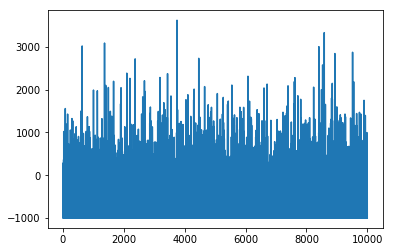

In [141]:
# The next line makes sure that any plots we make appear graphically in our noteboook
%matplotlib inline
higgsData["DER_mass_jet_jet"].plot()

* Note that the pandas authors didn't make their own plotting library - they used the standard Python plotting library [`matplotlib`](https://matplotlib.org/)
  * This is the way that healthy ecosystems work!

Note that what we plotted here by default is the EventId (as `x`) against the DER_mass_jet_jet column (as `y`) - probably not quite as useful as it could be

Let's try a histogram instead

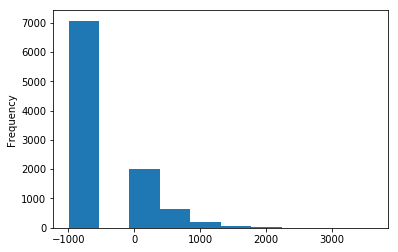

In [142]:
higgsData["DER_mass_jet_jet"].plot.hist()

Ah, but now we have a problem - the `-999.0` values are being treated as legitimate data

However, pandas makes it very easy to filter the data that we have, excluding the invalid data points

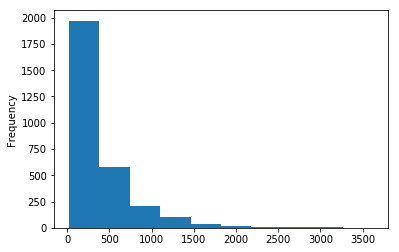

In [143]:
cleanHData = higgsData["DER_mass_jet_jet"][higgsData["DER_mass_jet_jet"] > 0]
cleanHData.plot.hist()

The selection syntax is very powerful and can combine cuts using logical operators: `&` for *and*, `|` for *or* and `-` for *not*

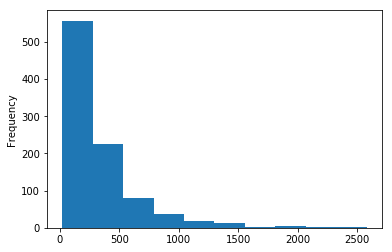

In [144]:
cleanHData3jet=higgsData["DER_mass_jet_jet"][(higgsData["PRI_jet_num"] >= 3) & (higgsData["DER_mass_jet_jet"] > 0)]
cleanHData3jet.plot.hist()

In the last example we only selected a single column, but we can select an arbitrary number:

In [145]:
len(cleanHData)

2938

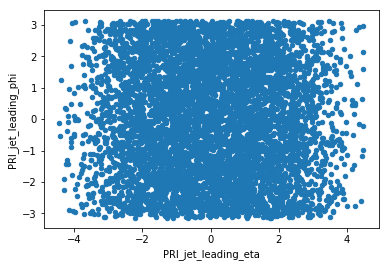

In [146]:
leadJet=higgsData[["PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_all_pt","Label"]][higgsData["PRI_jet_num"]>0]
leadJet.plot.scatter(x="PRI_jet_leading_eta", y="PRI_jet_leading_phi")

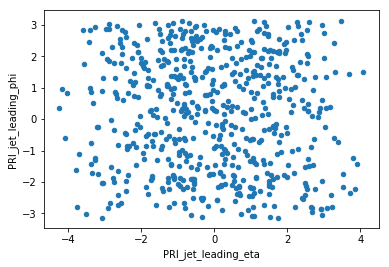

In [147]:
# We can easily use slices and strides to plot only part of the dataset
leadJet[::10].plot.scatter(x="PRI_jet_leading_eta", y="PRI_jet_leading_phi")

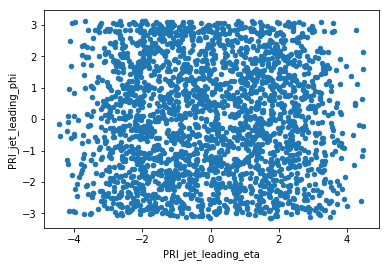

In [148]:
# Here we put an extra selector into the plot, taking only signal events
leadJet[:][leadJet["Label"]=="s"].plot.scatter(x="PRI_jet_leading_eta", y="PRI_jet_leading_phi")

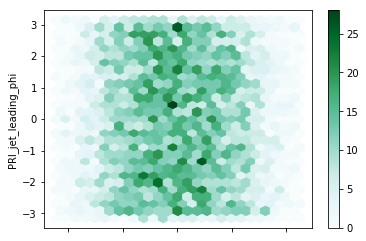

In [149]:
# Or use a hexbin density plot
leadJet.plot.hexbin(x="PRI_jet_leading_eta", y="PRI_jet_leading_phi", gridsize=25)

Exploring some more...

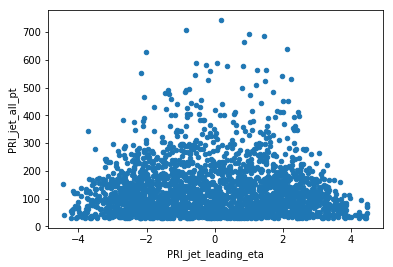

In [150]:
leadJet[:][leadJet["Label"]=="s"].plot.scatter(x="PRI_jet_leading_eta", y="PRI_jet_all_pt")

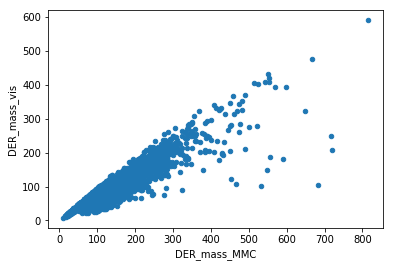

In [151]:
derMass=higgsData[["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","Label"]][higgsData["DER_mass_MMC"]>0]
derMass.plot.scatter(x="DER_mass_MMC", y="DER_mass_vis")

This is interesting - it looks like there's a clear relationship between these two mass variables

So let's try and fit it, using numpy's [`polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function

In [152]:
import numpy as np # Standard shorthand for numpy!
fit=np.polyfit(derMass["DER_mass_MMC"],derMass["DER_mass_vis"],deg=1)
print(fit) # Array of polynominal coefficients, highest to lowest

[0.61309101 7.66732044]


Now we can dynamically add this data into our original Higgs ML data - pandas is quite happy for us to define a new column in the dataset with derived data

In [153]:
# The numpy polyval function evalutes a polynomonal at a set of points
derMass['polyfit'] = np.polyval(fit, derMass["DER_mass_MMC"])
derMass[:5]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,Label,polyfit
0,138.470,51.655,97.827,27.980,s,92.562033
1,160.937,68.768,103.235,48.146,b,106.336349
3,143.905,81.417,80.943,0.414,b,95.894183
4,175.864,16.915,134.805,16.405,b,115.487959
5,89.744,13.550,59.149,116.344,b,62.688560


So far we saw how to plot a single piece of data at a time, but it's quite easy to do more than one, laying plot data one on top of another:

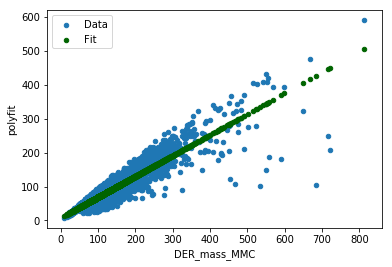

In [154]:
ax=derMass.plot.scatter(x="DER_mass_MMC", y="DER_mass_vis", label="Data")
derMass.plot.scatter(x="DER_mass_MMC", y='polyfit', color='DarkGreen', label='Fit', ax=ax);

## Seaborn

Here's another extremely useful python library, the [*seaborn*](http://seaborn.pydata.org/index.html) statistical visualisation library

This is built on top of the vanilla matplotlib we were implicitly using up to now and it's perfect for this task as it combines fitting and plotting in one

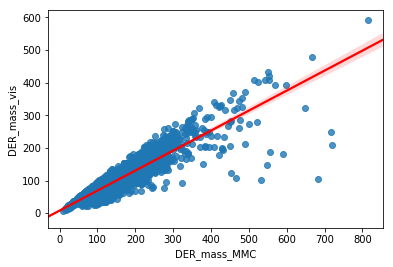

In [155]:
import seaborn as sns
sns.regplot(derMass["DER_mass_MMC"], derMass["DER_mass_vis"], line_kws={"color": "red"}, order=1)

## Just how fast is this anyway?


We can compare how fast the numpy line fit code it with doing things in plain python using ipython's `%%timeit` magic

In [156]:
xarr=list(derMass["DER_mass_MMC"])
yarr=list(derMass["DER_mass_vis"])
xnparr=np.array(xarr)
ynparr=np.array(yarr)

In [157]:
%%timeit
xmean=ymean=0.0
for x, y in zip(xarr, yarr):
    xmean+=x
    ymean+=y
xmean/=len(xarr)
ymean/=len(yarr)
mnum=mden=0.0
for x, y in zip(xarr, yarr):
    mnum+=(x-xmean)*(y-ymean)
    mden+=(x-xmean)**2
m=mnum/mden
b=ymean-m*xmean

2.3 ms ± 29.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [158]:
%%timeit
np.polyfit(xnparr, ynparr, 1)

599 µs ± 5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In this simple example we got a significant speed-up (x4), but in more complex manipulations speed ups of x100 are not unusual

## Moving On

Obviously this was barely scratching the surface of what Python can do in the data analysis domain

There are many nice tutorials and resources around for this and some packages that are well worth your time are:

* [numpy](http://www.numpy.org/) - The high performance core of all serious Python numerics
* [pandas](https://pandas.pydata.org/) - Python Data Analysis package for importing working with bulk data
* [scipy](https://www.scipy.org/) - Lots of common scientific routines, such as minimisation
* [xarray](http://xarray.pydata.org/en/stable/why-xarray.html#core-data-structures) - Pandas for multi-dimensional structures
* [matplotlib](https://matplotlib.org/) - The most popular Python plotting package
* [scikit-learn](http://scikit-learn.org/stable/index.html) - Easy to use machine learning for Python

And there is also a whole HEP eco-system based around our data system and analysis toolkit from the ROOT domain

# A Few Last Python Pointers

Let's close this tutorial session going back to core Python and picking up on a few things that are rather important, but quite easy to overlook

Obviously it takes quite a lot of practice to get really comfortable in Python, but the following slides tell you about some key features that will save you a lot of pain

## Some notable useful loop utilities

We looked at loops and how Python happily will run the same code over every item it gets back from an iterator - in general you just don't need to care how far through the sequence you are

However, what if you *do* need to know this, e.g., something special needs to happen at the beginning or the end?

The solution is `enumerate` that produces a counter that runs along with the loop

In [159]:
for i, animal in enumerate(["dog", "cat", "giraffe", "toad"]):
    print(animal, "was number", i, "in my list")

dog was number 0 in my list
cat was number 1 in my list
giraffe was number 2 in my list
toad was number 3 in my list


If you have multiple lists that you want to march over in sync, then use `zip` 

In [160]:
forename=["Michael", "Terry", "Graham", "John", "Eric"]
surname=["Palin", "Gilliam", "Chapman", "Cleese", "Idle"]
alive=[True, True, False, True, True]
for fn, sn, al in zip(forename, surname, alive):
    print(fn, sn, "is", "alive" if al else "dead")

Michael Palin is alive
Terry Gilliam is alive
Graham Chapman is dead
John Cleese is alive
Eric Idle is alive


Note the clever use of the ternary operator there!

## Parameter passing - bindings and object references

In Python the `=` operator does not copy objects, instead it makes a new binding to them; this means that the same object can have multiple bindings and if the object changes both bindings will reflect that:

In [161]:
my_list = list(range(5))
your_list = my_list
your_list[2] = "stuck in the middle"
print(my_list)

[0, 1, 'stuck in the middle', 3, 4]


This also behaviour also applies to function calls:

In [162]:
def sillyMiddle(l):
    l[len(l)//2] = "silly"
    
my_list = list(range(5))
your_list = my_list
sillyMiddle(your_list)
print(my_list, your_list) # Both refer to the same, modified object

[0, 1, 'silly', 3, 4] [0, 1, 'silly', 3, 4]


But beware of a subtlety here...

In [171]:
def setToSeven(x, s, d):
    x=7                 # We just created a *local* variable x, bound to 7; but the caller binding remains unchanged
    s="inner"           # Ditto for the string s
    d["inner"] = True   # Here the object is updated, but the binding remains the same
    print("Set to", x)
    
x=5; s="outer"; d=dict()
print("Start", x, s, d)
setToSeven(x, s, d)
print("End", x, s, d)

Start 5 outer {}
Set to 7
End 5 outer {'inner': True}


Python does not pass by C++ style *value* or *reference*, but by object. So mutable objects changed within a function call will be seen as changed by their caller (as the object binding itself did not change); however, immuatable objects, like numbers, strings and tuples, cannot be changed and so assigning to creates a new local binding - the outside binding remains unchanged.

If you do need to really make a new copy of an object, use the *copy* module

In [164]:
from copy import deepcopy # Deep copy copies the container and copies all objects recursively
her_list = deepcopy(my_list)
her_list.append("this is the end")
print(my_list[-1], "--", her_list[-1])

4 -- this is the end


It's worth reminding you here that slicing a list in normal Python does produce a copy - if you want to modify a list during a loop you'd better do that

# First class functions

One of Python's great features is that functions are *first class objects*, which means that they can be generated on the fly and returned from other functions:

In [165]:
def addText(s):
    def addSomeText(f):
        f=f+s
        return f
    return addSomeText

sw=addText("swallow")
print(type(sw))
sw("good lord it's an unladen ")

<class 'function'>


"good lord it's an unladen swallow"

In [166]:
ne=addText("newt")
print(ne("she turned me into a "))

she turned me into a newt


## A little bit more about printing and formatting...

We deliberately kept our use of the `print` function quite basic so far, although we did toss in a few of it's extra parameters:
* `end` - string to print at the end of the output (default, `\n`)
* `sep` - separator between output elements (default a space)
* `file` - target output file stream (default `sys.stdout`)

To format things in a little more easily with Python strings, you can use the [*f-string*](https://docs.python.org/3/reference/lexical_analysis.html#f-strings) notation, which allows you to write variable names in `{}`s and they will be substituted in

In [167]:
bird="swallow"
state="unladen"
print(f"Look! It's an {state} {bird}") # N.B. String is prefixed with "f"

Look! It's an unladen swallow


Numbers can take format specifiers to control how they are printed

In [168]:
import math
hx=0xdeadbeef
f1=math.pi
print(f"The number is {hx} (or {hx:#0x}); we love {math.pi}, or {math.pi:.3} if we are in a hurry")

The number is 3735928559 (or 0xdeadbeef); we love 3.141592653589793, or 3.14 if we are in a hurry


# Some standard module highlights

There is an absolute wealth of useful code inside Python's own [standard modules](https://docs.python.org/3/py-modindex.html); a few of the most important and useful modules are:

* `argparse` - for parsing script options passed on the command line
* `configparser` - for reading settings from standard INI files
* `datetime`, `time` - functions for date and time manipulation
* `fnmatch`, `glob` - shell style matching of files and strings
* `logging` - powerful utility for writing log messages from programs
* `math` - maths functions (though for large amounts of data use `numpy`!)
* `os` - operating system interfaces (including the filesystem)
* `re` - regular expressions
* `sys` - system parameters and functions
* `unittest` - xUnit testing framework for Python

## Python2 and Python3

* Python is currently finishing a major version transition, from 2 to 3
  * Python2 support [stops quite soon](https://pythonclock.org/), on 1 January 2020
* Almost every major useful Python module now runs in Python 3, so it's the recommended way to start any new project
* Python 3...
  * Introduces a new `print()` function instead of the old Python2 `print` *statement*
  * Integer division (`3/2`) will return a float (use `3//2` if you want pure rounded int division)
  * Strings in Python3 are all *unicode* and pure data should be stored in `bytes` or `bytearray`
  * `range` becomes an iterator by default and there is no `xrange` (use `list(range(...))` to get a list if you need it)
  * Exceptions are raised more consistently (`raise IOError("disk drive on fire")`)
    * And handled more easily using `as` (`except NameError as err`)
  * Oh, and Python3 is often a lot faster as well

## Python3 and HEP

* However... although Python3 is now the standard, in the HEP community we are a bit behind
  * You may therefore find you have to use Python2 for some HEP use cases
  * In which case you should definitely take a look at the `__future__` module that can allow you to write Python2 code using a lot of Python3 syntax in advance
  * But there are a few things you just don't have - sorry, no f-strings!

```py
lxplus015:~$ python
Python 2.7.5 (default, Jul 13 2018, 13:06:57) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-28)] on linux2
Type "help", "copyright", "credits" or "license" for more information.
>>> print("hello, world!") # Actually this is also ok in Python2.7
hello, world!
>>> 3/2
1
>>> from __future__ import division, print_function
>>> print(3/2)
1.5
```


# Final Words

In case you didn't yet realise it, **Python is pretty amazing**

It's a highly productive language that's easy to learn and opens a world of possibility for effective and efficient programming

This introduction was as much of a taster as could be managed in the time we had, but there are now many avenues that you could explore from here:

* The Python tutorial is a nice introduction that covers a lot of the basic ground for Python
* The LHCb *StarterKit* provides grounded training for physicists with nice exercises to do on the way
* The [HEP Software Foundation](https://hepsoftwarefoundation.org/) is compiling a list of [Python resources](https://github.com/hsf-training/PyHEP-resources) for our community

You can find many more resources by searching the internet and sites like *Stack Overflow* contain a wealth of answers to common problems

Last, but not least, your colleagues and fellow Pythonistas will be a source of help, advice, fixes and, if all else fails, solace

**Enjoy Python**

# Backup

## Getting notebooks up and running

We pointed out some of the great features of notebooks at the start, here are some pointers...

* The [Project Jupyter website](https://jupyter.org/) (see [install](https://jupyter.org/install))

The easy ways to install are through the Anaconda python distribution or using pip

Then you can clone this lecture and start the notebook server...

```
git clone ...
jupyter notebook
[I 18:55:02.119 NotebookApp] Serving notebooks from local directory: /Users/graemes/docs
[I 18:55:02.120 NotebookApp] The Jupyter Notebook is running at:
[I 18:55:02.120 NotebookApp] http://localhost:8888/?token=bd9fb3599d7b4f7bf23a53efd8987cf3cc8dc1fe4d358eb6
```

...and navigate to the notebook link given (usually it starts automatically)

# Acknowledgements

Many thanks to all my colleagues who helped provide pieces of material that got sliced, diced and re-assembled into this tutorial

Particular thanks to 

* the LHCb StarterKit team (Arthur, Chris, Violeene, Dario in particular) who wrote a great "follow-along" tutorial
* Jim Pivarski who has a deep understanding of all things Python and how they fit for HEP
* Eduardo Rodrigues, who was the driving force behind our new HSF PyHEP group
